# TP2 - Text-mining and chatbots [CONLL]
**Students**:
- Thanh Gia Hieu KHUONG
- Ragi BHATT
- Benedictus Kent RACHMAT

## Download the dataset

In [ ]:
%%bash

git clone --quiet https://github.com/ktgiahieu/text-mining-class.git
unzip -q /content/text-mining-class/TP2/QUAERO_FrenchMed_TP2021.zip

In [1]:
PATH="QUAERO_FrenchMed_TP2021"

## Import

In [2]:
from collections import defaultdict
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [3]:
def get_statistics(dataset_dir):
  statistics = {}
  for split in ['train', 'dev', 'test']:
    for subset in ['EMEA', 'MEDLINE']:
      split_dir = os.path.join(dataset_dir, split, subset)

      if not os.path.exists(split_dir):
        continue

      # Iterate over each file in the split directory
      for file in os.listdir(split_dir):
          file_path = os.path.join(split_dir, file)

          conll_df = pd.read_csv(file_path, sep='\t', header=None, names=['entity', 'start', 'end', 'token'])

          conll_df.dropna(inplace=True)
          conll_df.reset_index(drop=True, inplace=True)

          # Number of tokens
          num_tokens = conll_df.shape[0]

          # Number of entities
          entities = conll_df[conll_df['entity'] != 'O'][['entity', 'token']]
          num_entities = len(entities)
          num_entities_types = len(entities['entity'].unique())

          # Number of unique entities
          entities.drop_duplicates(inplace=True)
          num_unique_entities = len(entities)

          # Number of entities per type
          entities_per_type = defaultdict(int)
          for entity in entities['entity']:
              entities_per_type[entity] += 1

          statistics[f"{subset}_{split}"] = {
              'num_tokens': num_tokens,
              'num_entities': num_entities,
              'num_unique_entities': num_unique_entities,
              'num_entity_types': num_entities_types,
              'entities_per_type': entities_per_type
          }
  return statistics 

def plot_statistics(statistics, category):
    # Define subsets and splits
    subsets = ['EMEA', 'MEDLINE']
    splits = ['train', 'dev', 'test']
    
    # Prepare the data for plotting
    data = {subset: [statistics[f"{subset}_{split}"][category] for split in splits] for subset in subsets}
    
    # Number of groups and bar width
    n_groups = len(splits)
    bar_width = 0.35
    index = np.arange(n_groups)
    
    # Create the bar plot
    plt.figure(figsize=(10, 5))
    for i, (subset, counts) in enumerate(data.items()):
        bars = plt.bar(index + i * bar_width, counts, bar_width, label=subset)

        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), 
                    verticalalignment='bottom', 
                    horizontalalignment='center',  
                    fontsize=8, color='black') # 

    # Add labels, title, and legend
    plt.xlabel('Splits')
    plt.ylabel(category.replace('_', ' ').title())
    plt.title(f'{category.replace("_", " ").title()} per Split and Subset')
    plt.xticks(index + bar_width / 2, splits)
    plt.legend()
    plt.tight_layout()
    plt.show()

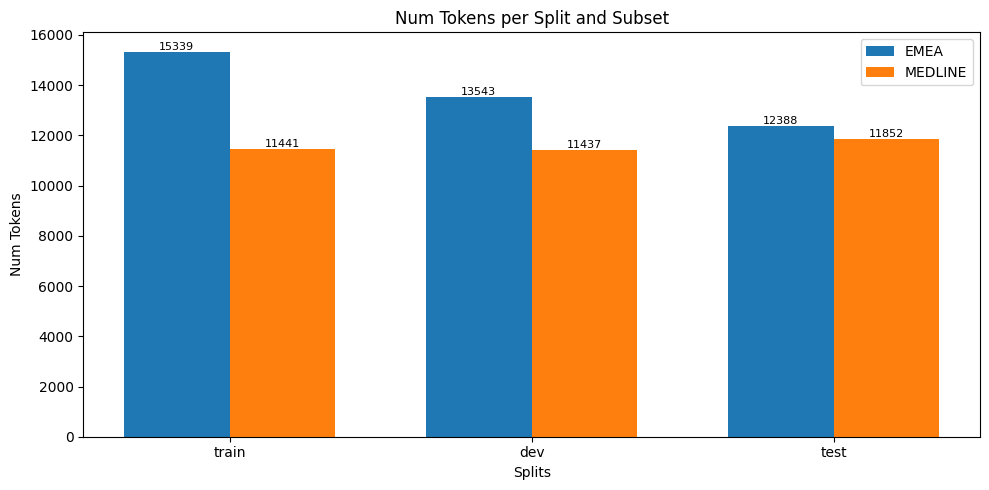

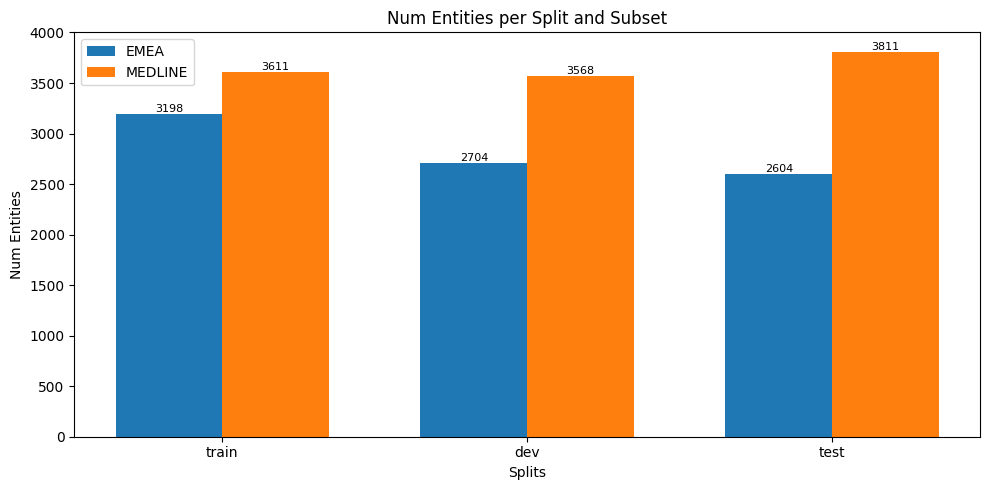

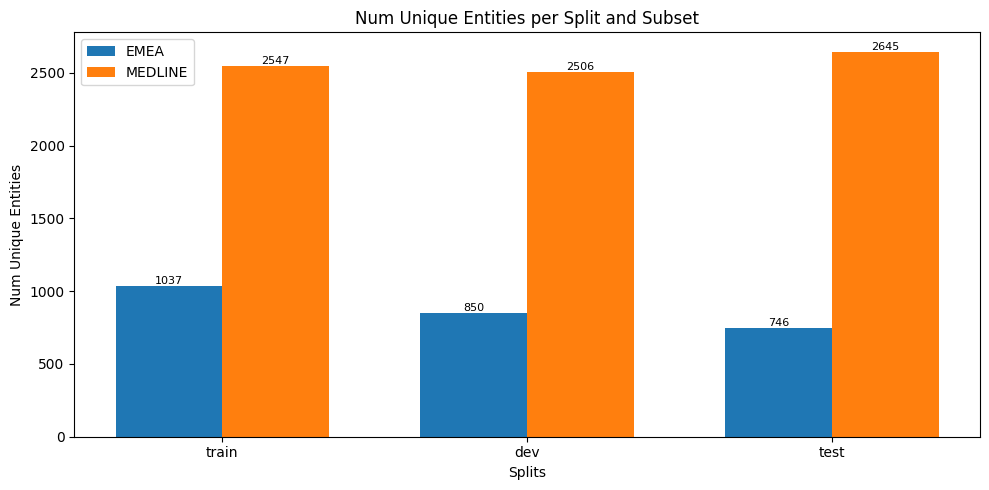

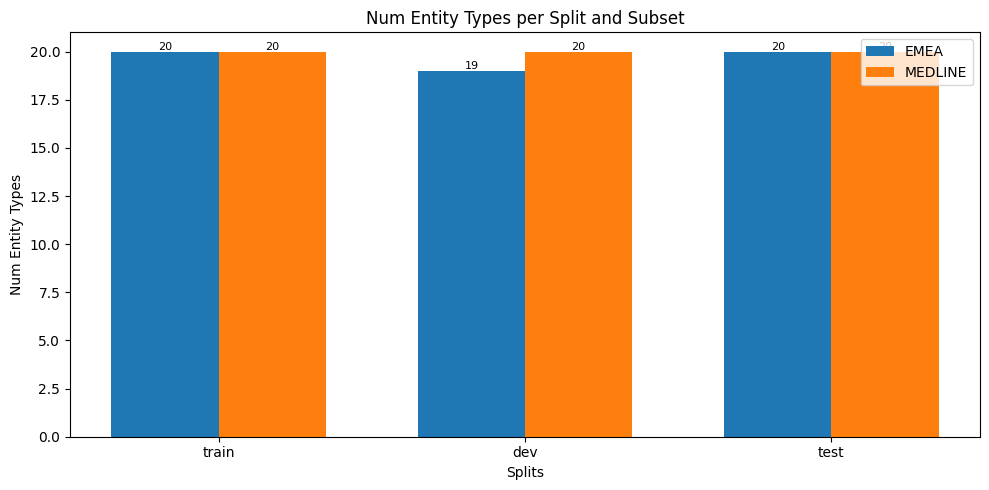

In [4]:
dataset_statistics = get_statistics("QUAERO_FrenchMed_TP2021/QUAERO_FrenchMed_conll/corpus")
for category in ['num_tokens', 'num_entities', 'num_unique_entities', 'num_entity_types']:
    plot_statistics(dataset_statistics, category)

In [5]:
dataset_statistics

{'EMEA_train': {'num_tokens': 15339,
  'num_entities': 3198,
  'num_unique_entities': 1037,
  'num_entity_types': 20,
  'entities_per_type': defaultdict(int,
              {'CHEM-B': 122,
               'PROC-B': 85,
               'CHEM-I': 50,
               'DISO-B': 234,
               'DISO-I': 178,
               'LIVB-B': 49,
               'PROC-I': 46,
               'ANAT-B': 74,
               'ANAT-I': 26,
               'DEVI-B': 11,
               'OBJC-B': 20,
               'LIVB-I': 32,
               'PHEN-B': 12,
               'PHYS-B': 52,
               'PHYS-I': 23,
               'PHEN-I': 3,
               'GEOG-B': 12,
               'GEOG-I': 4,
               'OBJC-I': 3,
               'DEVI-I': 1})},
 'MEDLINE_train': {'num_tokens': 11441,
  'num_entities': 3611,
  'num_unique_entities': 2547,
  'num_entity_types': 20,
  'entities_per_type': defaultdict(int,
              {'PROC-B': 295,
               'DISO-B': 506,
               'DISO-I': 400,
         

missing entities_per_type plot